# Python_Web_Scraping/NLP_Basics_2

Created on Sat Sep 29 14:33:28 2018

@author: Charles Garrett Eason

Github Location: https://github.com/eason9/Python-JN-Demos.git


## What is Web Scraping?

Webscraping is the process of extracting information from websites using Hypertext Transfer Protocol (HTTP) or a web browser.  It can be done manually (bad idea) or by using software.  Typically, once the raw data is obtained it is parsed (Typically HTML or Java Script) and the relevant information is then extracted using some technique.


## Why use Python to Web Scrape?

Because it is easy to automate the process of web scraping in Python.  Due to the general purpose nature of Python, it is also easy to embedd any Python made web scraper into other projects.

## Packages
We will be using the following packages:

In [280]:
import requests
from bs4 import BeautifulSoup
import time
import pandas
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
import re
import nltk
from os import listdir
from os.path import isfile, join
import pandas as pd
from nltk.corpus import reuters
import spacy
from collections import Counter

## Basics of HTML code
Take note of the following tags, they will be useful for finding relevant information in HTTP requests:

* HTML documents begin with a document type declaration: `<!DOCTYPE html>`
* The HTML document actually begins and ends with: `<html>`,  `</html>`
* The visible HTML code begins and ends with: `<body>`, `</body>`
* HTML headings are defined from 1-6 (most important heading to leas important) and begin and end with: `<h1>`,`</h1>`, . . ., `<h6>`, `</h6>`
* Interior paragraphs begin and end with: `<p>`, `</p>`
* A division or section is defined with: `<div>`, `</div>`
* HTML links begin and end with: `<a href="[link location in place of brackets]">`, `</a>`
* Images are defined with the image tag:  `<img src="[source image]" alt="[alternative text]" width="[width]" height="[height]">`
* HTML buttons begin and end with: `<button>`, `</button>`
* Ordered lists begin and end with: `<ol>`, `</ol>`
* Unordered lists begin and end with: `<ul>`, `</ul>`
* List elements begin and end with: `<li>`, `</li>`

## Regular Expressions (Regex)
A regular expression (regex) is a special string of text that can be used to describe patterns in strings.  A regular expression "engine" is some software that can process regular expressions to identify the regular expression exhibited in a string.  Regular expressions can be thought of as a sub-language embedded within other more general purpose programming languages (like Python).  They are very powerful and useful for identifying text patterns.

---

A random cheatsheet about regex's can be found here: https://www.dataquest.io/wp-content/uploads/2019/03/python-regular-expressions-cheat-sheet.pdf

Here are some regex highlights:

`^` - Beginning of the string or exclusions of a set.

`$` - End of the string.

`(`, `)` - Signifies a group to be matched.

`[`, `]` - signifies a set of symbols to be matched to a single character.

`a-z` - A single character between `a` and `z`.

`0-9` or `/d` - A single character between `0` and `9`.

`_`, `\.`, `-` - Matches `_`, `.`, or `-` respectively.  Notice the need to escape some special characters with `\`.

`+` - Matches one or unlimited times for the preceding symbol or set.

`*` - Matches zero or unlimited times for the preceding symbol or set.

`{<number1>, <number2>}` - Matches any amount of times provided between number1 and number2  for the preceding symbol or set.

`(?<=<look ahead regex>)` - Group used to match what is before the match.

`(?=<look behind regex>)` - Group used to match what is after the match.

---

You can test your regex here (there is also an expanation of the syntax here): https://regex101.com/

---

Regular expressions can be used in python with the `re` package.

There are three main functions (among many others) in the re package that are typically used to locate relevant information in strings:

`re.match()` - Looks at the _beginning_ of the string to match the regex.

`re.search()` - Looks _through_ the string and returns the _first_ pattern where the regex matched.

`re.findall()` - Looks _through_ the string and returns _all_ the patterns where the regex matched.

---


Here are some examples to solidify how regex's work:

Suppose we wanted to find the speakers from the following 1980 presidential debate excerpt, given a list of each paragraph:

```
MR. ELLIS. Mr. President, when you were elected in 1976, the Consumer Price Index stood at 4.8 percent. It now stands at more than 12 percent. Perhaps more significantly, the Nation's broader, underlying inflation rate has gone up from 7 to 9 percent. Now, a part of that was due to external factors beyond U.S. control, notably the more than doubling of oil prices by OPEC last year.

Because the United States remains vulnerable to such external shocks, can inflation in fact be controlled? If so, what measures would you pursue in a second term?

THE PRESIDENT. Again it's important to put the situation into perspective. In 1974 we had a so-called oil shock, wherein the price of OPEC oil was raised to an extraordinary degree. We had an even worse oil shock in 1979. In 1974 we had the worst recession, the deepest and most penetrating recession since the Second World War. The recession that resulted this time was the briefest we've had since the Second World War.

In addition, we've brought down inflation. Earlier this year, the first quarter, we did have a very severe inflation pressure, brought about by the OPEC price increase. It averaged about 18 percent the first quarter of this year. The second quarter, we had dropped it down to about 13 percent. The most recent figures, the last 3 months, or the third quarter of this year, the inflation rate is 7 percent — still too high, but it illustrates very vividly that in addition to providing an enormous number of jobs — 9 million new jobs in the last 3 1/2 years — that the inflationary threat is still urgent on us.

I noticed that Governor Reagan recently mentioned the Reagan-Kemp-Roth proposal, which his own running mate, George Bush, described as voodoo economics, and said that it would result in a 30-percent inflation rate. And Business Week, which is not a Democratic publication, said that this Reagan-Kemp-Roth proposal — and I quote them, I think-was completely irresponsible and would result in inflationary pressures which would destroy this Nation.

So, our proposals are very sound and very carefully considered to stimulate jobs, to improve the industrial complex of this country, to create tools for American workers, and at the same time would be anti-inflationary in nature. So, to add 9 million new jobs, to control inflation, and to plan for the future with the energy policy now intact as a foundation is our plan for the years ahead.

MR. SMITH. Mr. Ellis, do you have a followup question for Mr. Carter?

MR. ELLIS. Yes, Mr. President. You have mentioned the creation of 9 million new jobs.

THE PRESIDENT. Yes.
```

In [51]:
string_list = [
"MR. ELLIS. Mr. President, when you were elected in 1976, the Consumer Price Index stood at 4.8 percent. It now stands at more than 12 percent. Perhaps more significantly, the Nation's broader, underlying inflation rate has gone up from 7 to 9 percent. Now, a part of that was due to external factors beyond U.S. control, notably the more than doubling of oil prices by OPEC last year.",
"Because the United States remains vulnerable to such external shocks, can inflation in fact be controlled? If so, what measures would you pursue in a second term?",
"THE PRESIDENT. Again it's important to put the situation into perspective. In 1974 we had a so-called oil shock, wherein the price of OPEC oil was raised to an extraordinary degree. We had an even worse oil shock in 1979. In 1974 we had the worst recession, the deepest and most penetrating recession since the Second World War. The recession that resulted this time was the briefest we've had since the Second World War.",
"In addition, we've brought down inflation. Earlier this year, the first quarter, we did have a very severe inflation pressure, brought about by the OPEC price increase. It averaged about 18 percent the first quarter of this year. The second quarter, we had dropped it down to about 13 percent. The most recent figures, the last 3 months, or the third quarter of this year, the inflation rate is 7 percent — still too high, but it illustrates very vividly that in addition to providing an enormous number of jobs — 9 million new jobs in the last 3 1/2 years — that the inflationary threat is still urgent on us.",
"I noticed that Governor Reagan recently mentioned the Reagan-Kemp-Roth proposal, which his own running mate, George Bush, described as voodoo economics, and said that it would result in a 30-percent inflation rate. And Business Week, which is not a Democratic publication, said that this Reagan-Kemp-Roth proposal — and I quote them, I think-was completely irresponsible and would result in inflationary pressures which would destroy this Nation.",
"So, our proposals are very sound and very carefully considered to stimulate jobs, to improve the industrial complex of this country, to create tools for American workers, and at the same time would be anti-inflationary in nature. So, to add 9 million new jobs, to control inflation, and to plan for the future with the energy policy now intact as a foundation is our plan for the years ahead.",
"MR. SMITH. Mr. Ellis, do you have a followup question for Mr. Carter?",
"MR. ELLIS. Yes, Mr. President. You have mentioned the creation of 9 million new jobs.",
"THE PRESIDENT. Yes."
    ]
speakers = []
for string in string_list:
    match = re.match('[A-Z]{1,3}\.{0,1}\s[A-Z]+\.', string)
    if match:
        if match[0] not in speakers:
            speakers.append(match[0])
print('Speakers from debate excerpt: ', speakers)

Speakers from debate excerpt:  ['MR. ELLIS.', 'THE PRESIDENT.', 'MR. SMITH.']


Suppose we wanted to obtain the email address from the following string:

```
asdf g3456sdfg sdfg john@doe.com fhjk678ghj kgh5jkghjkg ghj5678k
```

In [19]:
string = 'asdf g3456sdfg sdfg john@doe.com fhjk678ghj kgh5jkghjkg ghj5678k'
search = re.search('([a-z0-9_\.-]+)@([\da-z\.-]+)\.([a-z\.]{2,6})', string)
print('Full match  : ', search.group()) # Outputs the entire match.
print('First group : ', search.group(1)) # Different groups can also be called.
print('Second group: ', search.group(3)) # Different groups can also be called.

Full match  :  john@doe.com
First group :  john
Second group:  com


Suppose we wanted to obtain the phone numers from the following HTML list:

```
<p >Phone numbers</p>\
<ul>\
  <li>(021)1234567 </li>\
  <li>(123) 456 7899 </li>\
  <li>(123).456.7899 </li>\
  <li>(123)-456-7899 </li>\
  <li>123-456-7899 </li>\
  <li>123 456 7899 </li>\
  <li>1234567899 </li>\
  <li>0511-4405222 </li>\
  <li>021-87888822 </li>\
  <li>+8613012345678 </li>\
</ul>
```

In [33]:
string = \
"<p >Phone numbers</p>\
<ul>\
  <li>(021)1234567 </li>\
  <li>(123) 456 7899 </li>\
  <li>(123).456.7899 </li>\
  <li>(123)-456-7899 </li>\
  <li>123-456-7899 </li>\
  <li>123 456 7899 </li>\
  <li>1234567899 </li>\
  <li>0511-4405222 </li>\
  <li>021-87888822 </li>\
  <li>+8613012345678 </li>\
</ul>"
findall = re.findall('[\(\+]{0,1}\d{2,4}[\)-\.\s]{0,2}\d{0,3}[\s\.-]{0,1}[\d]{0,6}', string)
print('Full match   : ', findall) # List of all the matches.
print('First number : ', findall[0]) # Different elements can also be called.
print('Last number  : ', findall[-1]) # Different elements can also be called.

Full match   :  ['(021)1234567', '(123) 456 7899', '(123).456.7899', '(123)-456-7899', '123-456-7899', '123 456 7899', '1234567899', '0511-4405222', '021-87888822', '+8613012345678']
First number :  (021)1234567
Last number  :  +8613012345678


Notice, `.match` will be faster than `.search` and `.search` will be faster than `.findall`.

Regex's are very powerful; however, they can be slow if over used.  Try to use them appropriately; there are other more efficient ways to get information from text that we will go over later.

## Basic Webscraping
### Getting raw information from a website
#### Requests
Using the API "requests" we can obtain a raw HTTP request directly in Python (note: the "requests" API is the de-facto standard for making HTTP requests in Python).  For example, we can make an HTTP request for https://apnews.com/17468e23e4fd4728be6efc84ffd1c600 by using:

In [129]:
u = r'https://apnews.com/17468e23e4fd4728be6efc84ffd1c600'  # Note: this is a raw string, denoted using r'text'.
response = requests.get(u)

The result is a "payload" of information.  If the request is successful it can be checked with `.status_code`.  If the result is `200`, the request was successful, if the result is `404`, there was a problem.

In [53]:
response.status_code

200

We can look at the "payload" can be inspected in bytes with `.content` and as a string with `.text`.

In [54]:
print(response.text)

<!DOCTYPE html><html><head><meta charset="UTF-8"><meta name="viewport" content="width=device-width, initial-scale=1"><link data-rh="true" rel="manifest" href="/manifest.json"/><link data-rh="true" rel="icon" sizes="16x16" href="/branding/favicon/16.png"/><link data-rh="true" rel="icon" sizes="24x24" href="/branding/favicon/24.png"/><link data-rh="true" rel="icon" sizes="32x32" href="/branding/favicon/32.png"/><link data-rh="true" rel="icon" sizes="64x64" href="/branding/favicon/64.png"/><link data-rh="true" rel="icon" sizes="128x128" href="/branding/favicon/128.png"/><link data-rh="true" rel="icon" sizes="256x256" href="/branding/favicon/256.png"/><link data-rh="true" rel="apple-touch-icon" href="/branding/apple-touch/ap-news-apple-touch-152.png"/><link data-rh="true" rel="apple-touch-icon" sizes="152x152" href="/branding/apple-touch/ap-news-apple-touch-152.png"/><link data-rh="true" rel="apple-touch-icon" sizes="180x180" href="/branding/apple-touch/ap-news-apple-touch-180.png"/><link 

Some notes on requests:

* Headers contain useful information about the "payload" and can be obtained with: `.headers`
* You can pass values for a query with: `params={'q': '<query here>'}`
* You can provide basic authentication with (if you do this you might want to use the "getpass" package): `auth=('<username>', '<password>'`
* You can timeout your request with: `timeout=<number of seconds>`
* Be aware that there are many other options in this package.

### Parsing
#### Beautiful Soup
Now that we have the HTTP response from the orignating server we need to parse this information into something our computer can understand and use.  We can achieve this through the package "bs4" (Beautiful Soup), which is a standard and very useful html parser.  Note: if the next line will not execute you likely need to install the lxml parser.  You can do this or just use whatever parser you have, e.g. 

`soup = BeautifulSoup(response.text)`

will parse the text using the best available HTML parser.

In [55]:
soup = BeautifulSoup(response.text, features="lxml")
print(soup)

<!DOCTYPE html>
<html><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><link data-rh="true" href="/manifest.json" rel="manifest"/><link data-rh="true" href="/branding/favicon/16.png" rel="icon" sizes="16x16"/><link data-rh="true" href="/branding/favicon/24.png" rel="icon" sizes="24x24"/><link data-rh="true" href="/branding/favicon/32.png" rel="icon" sizes="32x32"/><link data-rh="true" href="/branding/favicon/64.png" rel="icon" sizes="64x64"/><link data-rh="true" href="/branding/favicon/128.png" rel="icon" sizes="128x128"/><link data-rh="true" href="/branding/favicon/256.png" rel="icon" sizes="256x256"/><link data-rh="true" href="/branding/apple-touch/ap-news-apple-touch-152.png" rel="apple-touch-icon"/><link data-rh="true" href="/branding/apple-touch/ap-news-apple-touch-152.png" rel="apple-touch-icon" sizes="152x152"/><link data-rh="true" href="/branding/apple-touch/ap-news-apple-touch-180.png" rel="apple-touch-icon" sizes="180x180"/><li

Notice how the text is now parsed HTML code that Python recognizes and can use. E.g. the first like went from:

`<!DOCTYPE html><html><head><meta charset="UTF-8"><meta name="viewport" content="width=device-width, initial-scale=1"><lin`

to something that the interpreter understands:

`<!DOCTYPE html>`

The document is now parsed and we can begin to use the available functions to find information from the HTML script.  For example we can find the title of the document or a particular html tag within the document.

In [56]:
soup.title

<title data-rh="true">War epic 'Midway' bests 'Doctor Sleep' at the box office</title>

We can get the text of the title and now we know what this document is about (the movie "Midway")

In [57]:
soup.title.text

"War epic 'Midway' bests 'Doctor Sleep' at the box office"

### Using a Browser to Inspect HTML Elements

Supposed that we are interested in extracting the text from this article.  Given what we know about HTML code, we can use Beautiful Soup to find the tags in the parsed HTML script that pertain to the "story body".  To do this we need to rely on the standardized format from the particular website we are interested in scraping.  This can be done by opening the HTML inspector on your browser __(F12 opens the inspector on Chrome and Firefox)__.  For our purposes we can go directly to the elements we are interested in by __highlighting and right clicking__ on the element of interest and selecting: 

__* Fire fox - Inspect Element (Q)__

__* Chrome - Inspect__

This will immediately show use where in the HTML script the element of interest is located.  From this information we only need to find the relevant HTML tags of interest to pull out the relevant information.


In our case we need to find the section containing the body of the article for Associated Press articles.  In our case this can be done by inspecting a paragraph and then finding the section the associated paragraph exists under:

```
<div class="Article" data-key="article">
```

Now to get the content we simply need to obtain this section with attributes "class" assigned "Article".

In [67]:
content = soup.find("div", attrs={"class": "Article"})
content.text

'LOS ANGELES (AP) — Despite a fresh injection of four big movies into the marketplace including a Stephen King adaptation, a World War II epic, a glossy, holiday-themed romantic comedy and a family friendly comedy, audiences largely stayed away from theaters this weekend and the North American box office is hurting.Down nearly 27% from last year, the sluggish weekend allowed for a few big surprises however. The biggest surprise was the fact that the Roland Emmerich film “Midway,” which slightly overperformed, snagged the first-place spot over Warner Bros.′ “Doctor Sleep,” a film that came in well under expectations and has left many in the business scratching their heads as to why.Lionsgate on Sunday estimated that “Midway” earned $17.5 million from 3,242 screens. The studio acquired the film about the Battle of Midway that features a large ensemble cast including Nick Jonas and Patrick Wilson.“As expected, everyone is ecstatic,” said David Spitz, Lionsgate’s president of domestic dist

### Putting a Basic Web Scraper Togeather

Now we can just wrap all these steps into a funciton that is ready to scrape AP news. . .

In [71]:
def AP_Scraper(URLs):
    
    articles = {}
    for u in URLs:
        response = requests.get(u)
        soup = BeautifulSoup(response.text, features="lxml")
        content = soup.find("div", attrs={"class": "Article"})
        articles[u] = content.text
        
    return(articles)

In [84]:
URLs = ['https://apnews.com/17468e23e4fd4728be6efc84ffd1c600', 
        'https://apnews.com/7da90e2dc10d4dd18be63e4f3c8f0e9c', 
        'https://apnews.com/39295e05ab344e8f8b5ebc8160a3318d'
    ]
articles = AP_Scraper(URLs)

And now we have a basic webscraper:

In [85]:
for i in range(3):
    print(URLs[i]+' - ', articles[URLs[i]][:1000])

https://apnews.com/17468e23e4fd4728be6efc84ffd1c600 -  LOS ANGELES (AP) — Despite a fresh injection of four big movies into the marketplace including a Stephen King adaptation, a World War II epic, a glossy, holiday-themed romantic comedy and a family friendly comedy, audiences largely stayed away from theaters this weekend and the North American box office is hurting.Down nearly 27% from last year, the sluggish weekend allowed for a few big surprises however. The biggest surprise was the fact that the Roland Emmerich film “Midway,” which slightly overperformed, snagged the first-place spot over Warner Bros.′ “Doctor Sleep,” a film that came in well under expectations and has left many in the business scratching their heads as to why.Lionsgate on Sunday estimated that “Midway” earned $17.5 million from 3,242 screens. The studio acquired the film about the Battle of Midway that features a large ensemble cast including Nick Jonas and Patrick Wilson.“As expected, everyone is ecstatic,” sa

Becareful when scraping as many websites monitor their traffic to prevent excessive requests.  To circumvent this and avoid issues it might be prudent to wait between chunks of requests with the `.sleep()` funciton from the `time` package.  You don't want to get your IP banned temporarily (or sometimes even permanently).

In [87]:
time.sleep(2) # Do nothing for 2 seconds.

We can combine everything we've learned so far to scrape many things.  Let's try scraping urls from google for use in our already made webscraper.  Notice, we will begin by adding a query option for the user to search google in an automated fashion for a specific search.

<!doctype html><html lang="en"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>apples - Google Search</title><script nonce="2FBHc2dhvcw523gSMt8s3A==">(function(){var a=window.performance;window.start=(new Date).getTime();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,e=c.responseStart;if(e>d&&e<=window.start){window.start=e;b.wsrt=e-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{};google.aft=function(f){f.setAttribute("data-iml",+new Date)};}).call(this);(function(){window.jsarwt=function(){return!1};}).call(this);(function(){var c=[],e=0;window.ping=function(b){-1==b.indexOf("&zx")&&(b+="&zx="+(new Date).getTime());var a=new Image,d=e++;c[d]=a;a.onerror=a.onload=a.onabort=function(){delete c[d]};a.src=b};}).call(this);</script><style>body{margin:0 auto;max-width:736px;padding:0 8px}a{color:#1967D2;text-decoration:none;tap-highlight-color:rgba(0,0,0,.1)}a:
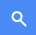
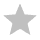
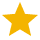
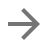
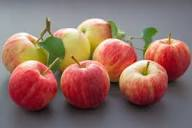
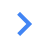

In [111]:
google_query = 'apples'
url = 'https://www.google.com/search'

query = {'q': google_query}
response = requests.get(
    url,
    params={'q': google_query}
)
print(response.text)

Again we parse the raw HTTP HTML response using Beautiful Soup.

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>apples - Google Search</title><script nonce="2FBHc2dhvcw523gSMt8s3A==">(function(){var a=window.performance;window.start=(new Date).getTime();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,e=c.responseStart;if(e>d&&e<=window.start){window.start=e;b.wsrt=e-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{};google.aft=function(f){f.setAttribute("data-iml",+new Date)};}).call(this);(function(){window.jsarwt=function(){return!1};}).call(this);(function(){var c=[],e=0;window.ping=function(b){-1==b.indexOf("&zx")&&(b+="&zx="+(new Date).getTime());var a=new Image,d=e++;c[d]=a;a.onerror=a.onload=a.onabort=function(){delete c[d]};a.src=b};}).call(this);</script><style>body{margin:0 auto;max-width:736px;padding:0 8px}a{color:#1967D2;text-decoration:none;tap-highlight-color:rgba(0,0,0,.1)
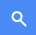
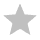
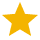
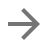
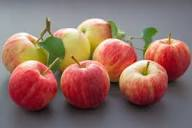
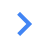

In [112]:
soup = BeautifulSoup(response.text, features="lxml")
print(soup)

Now we need to find the links in our parsed HTML script.  Rember from before that HTML links are denoted with the `<a>` tag.

[<a href="/?sa=X&amp;ved=0ahUKEwjmna3VtePlAhVGXsAKHcEnDsAQOwgC"><span class="V6gwVd">G</span><span class="iWkuvd">o</span><span class="cDrQ7">o</span><span class="V6gwVd">g</span><span class="ntlR9">l</span><span class="iWkuvd tJ3Myc">e</span></a>, <a class="l" href="/?output=search&amp;ie=UTF-8&amp;sa=X&amp;ved=0ahUKEwjmna3VtePlAhVGXsAKHcEnDsAQPAgE"><span class="V6gwVd">G</span><span class="iWkuvd">o</span><span class="cDrQ7">o</span><span class="V6gwVd">g</span><span class="ntlR9">l</span><span class="iWkuvd tJ3Myc">e</span></a>, <a href="/search?q=apples&amp;ie=UTF-8&amp;gbv=1&amp;sei=IP3JXeaNJ8a8gQbBz7iADA">here</a>, <a class="eZt8xd" href="/search?q=apples&amp;ie=UTF-8&amp;source=lnms&amp;tbm=isch&amp;sa=X&amp;ved=0ahUKEwjmna3VtePlAhVGXsAKHcEnDsAQ_AUICCgB">Images</a>, <a class="eZt8xd" href="/search?q=apples&amp;ie=UTF-8&amp;source=lnms&amp;tbm=shop&amp;sa=X&amp;ved=0ahUKEwjmna3VtePlAhVGXsAKHcEnDsAQ_AUICSgC">Shopping</a>, <a class="eZt8xd" href="/search?q=apples&amp;ie=UTF-8&amp;s
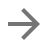

In [115]:
links_html = soup.findAll("a")
print(links_html)

We get quite a bit of output, but it's not clear where the links are located yet.  Notice that some of the tags clearly exhibit the links we are looking for, but others do not.  Also notice that all our links are contained in the `href` class, but not all `href` classes contain the links we are interested in.  Given that this is text data, a prime solution is to use regex's to match for the links we are interested in.

Using Beautiful Soup we can pass a regex compiler to search the assigned string to a particular class we are interested in (in this case `href`).  But first we need to capture the regex that will match what we are looking for.  Notice, for example, we are looking to match strings of this nature:

```
/url?q=https://www.medicalnewstoday.com/articles/267290.php
```

In [116]:
links_html = soup.findAll("a", attrs={'href': re.compile('^\/url\?q=https:\/\/')})
print(links_html)

[<a href="/url?q=https://www.abelandcole.co.uk/apples-700g&amp;sa=U&amp;ved=2ahUKEwjmna3VtePlAhVGXsAKHcEnDsAQndQBMAB6BAgMEAI&amp;usg=AOvVaw3myDjD6DKMIdlBHcfVk7aM"></a>, <a href="/url?q=https://www.medicalnewstoday.com/articles/267290.php&amp;sa=U&amp;ved=2ahUKEwjmna3VtePlAhVGXsAKHcEnDsAQFjAMegQIBBAB&amp;usg=AOvVaw2hea_siuwldM1xiO2oDuN9"><div class="BNeawe vvjwJb AP7Wnd">Apples: Health benefits, facts, research - Medical News Today</div><div class="BNeawe UPmit AP7Wnd">https://www.medicalnewstoday.com › articles</div></a>, <a href="/url?q=https://www.medicalnewstoday.com/articles/285430.php&amp;sa=U&amp;ved=2ahUKEwjmna3VtePlAhVGXsAKHcEnDsAQ0gIwDHoECAQQAw&amp;usg=AOvVaw1WxCS7isICnxyZ-rzTVLoS"><span class="XLloXe AP7Wnd">Pears</span></a>, <a href="/url?q=https://www.medicalnewstoday.com/articles/245259.php&amp;sa=U&amp;ved=2ahUKEwjmna3VtePlAhVGXsAKHcEnDsAQ0gIwDHoECAQQBA&amp;usg=AOvVaw1vHBITwUyU044Z1lfPXWES"><span class="XLloXe AP7Wnd">What are the top healthful foods?</span></a>, <a href=

This is the output we were looking for, a link in each element of our list.  All that is required now is using a regular expression to extract each link in the string of each element of our links list.  Notice, for example, the format we are looking to extract:

```
/url?q=https://www.abelandcole.co.uk/apples-700g&amp;s
```

In [117]:
links = []
for line in links_html:
    link = re.search('(?<=^<a href="\/url\?q=).*(?=&amp;s)', str(line))
    if link:
        links.append(link.group())
links

['https://www.abelandcole.co.uk/apples-700g',
 'https://www.medicalnewstoday.com/articles/267290.php',
 'https://www.medicalnewstoday.com/articles/285430.php',
 'https://www.medicalnewstoday.com/articles/245259.php',
 'https://www.medicalnewstoday.com/articles/318706.php',
 'https://en.wikipedia.org/wiki/Apple',
 'https://en.wikipedia.org/wiki/List_of_apple_cultivars',
 'https://en.wikipedia.org/wiki/Apple_Inc.',
 'https://en.wikipedia.org/wiki/Redlove_apples',
 'https://en.wikipedia.org/wiki/Welsh_apples',
 'https://en.wikipedia.org/wiki/Rosaceae',
 'https://en.wikipedia.org/wiki/Malus',
 'https://en.wikipedia.org/wiki/Plant',
 'https://www.healthline.com/nutrition/10-health-benefits-of-apples',
 'https://www.heb.com/static-page/apple-varieties',
 'https://www.epicurious.com/expert-advice/types-and-varieties-of-apples-article',
 'https://www.hsph.harvard.edu/nutritionsource/food-features/apples/',
 'https://accounts.google.com/ServiceLogin%3Fcontinue%3Dhttps://www.google.com/search%25

Now we just need to package this scraper into a funciton.

In [120]:
def Google_Scraper(google_query):
    url = 'https://www.google.com/search'

    query = {'q': google_query}
    response = requests.get(
        url,
        params={'q': google_query}
    )
    soup = BeautifulSoup(response.text, features="lxml")
    links_html = soup.findAll("a", attrs={'href': re.compile('^\/url\?q=https:\/\/')})
    links = []
    for line in links_html:
        link = re.search('(?<=^<a href="\/url\?q=).*(?=&amp;s)', str(line))
        if link:
            links.append(link.group())
    return(links)

Now lets use both our functions to find AP news articles on "apples".  To make sure everything functions properly lets restrict the website name to the ones we are intested in.

In [128]:
google_query = 'site: apnews.com apples'
links = Google_Scraper(google_query)
final_links = []
for l in links:
    if re.match('https:\/\/www.apnews.com/[a-z0-9]+', l):
        final_links.append(l)
    elif re.match('https:\/\/apnews.com/[a-z0-9]+', l):
        final_links.append(l)
articles = AP_Scraper(final_links)
for i in range(3):
    print(final_links[i]+' - ', articles[final_links[i]][:1000])

https://www.apnews.com/b108210233784b3fb1753d1bf6315a14 -  SPOKANE, Wash. (AP) — They call it the Cosmic Crisp. It’s not a video game, a superhero or the title of a Grateful Dead song.It’s a new variety of apple, coming to a grocery store near you Dec. 1Cosmic Crisp is the first apple ever bred in Washington state, which grows the majority of the United States’ apples. It’s expected to be a game changer.Already, growers have planted 12 million Cosmic Crisp apple trees, a sign of confidence in the new variety. While only 450,000 40-pound (18-kilogram) boxes will be available for sale this year, that will jump to more than 2 million boxes in 2020 and more than 21 million by 2026.The apple variety was developed by Washington State University. Washington growers, who paid for the research, will have the exclusive right to sell it for the first 10 years.The apple is called Cosmic Crisp because of the bright yellowish dots on its skin, which look like distant stars.“I’ve never seen an apple 

## Intermediate Web Scraping
### Automate the using of a Web Browser Directly
Sometimes you will need to login to a website before you can use it.  This will create problems for webscraping, while you can use `requests` to submit username and passwords, sometimes a webbrowser will be needed to directly input your credentials and submit them (typically through a button).  Luckly Python has libraries to help us with this issue, specifically `selenium`'s `webdriver` can be used for this purpose.  Note, in order to use the webdriver for Firefox you will need to download and use the "Gecko Driver".

Third party drivers can be found at: https://www.seleniumhq.org/download/

The Gecko Driver for Firefox specifically can be found at: https://github.com/mozilla/geckodriver/releases

---

To demonstrate how to use Selenium, we will be logging into The Wall Street Journal (WSJ) to scrape news articles.  We will first need to locate the login URL and start our browser.

In [143]:
Login_URL = r'https://id.wsj.com/access/pages/wsj/us/signin.html'
gecko_path = r'C:\Users\Sade\Desktop\geckodriver.exe'
U_P = {'username': 'easoncharles9@gmail.com', 'password': 'greatpassword9'}
URLs = ['https://www.wsj.com/articles/fitbit-to-be-acquired-by-google-llc-11572613473?mod=business_lead_pos1', 
        'https://www.wsj.com/articles/u-s-payrolls-grew-by-128-000-in-october-despite-the-gm-strike-11572611632?mod=hp_lead_pos1']

options = Options() # Using the default options from selenium.
options.headless = True # Operate the webdriver behind the scenes.
driver = webdriver.Firefox( # Initializing the webdriver with our options and the location to the Gecko Driver.
    options=options, 
    executable_path=gecko_path
)

['username', 'password']

Now that we have our webdriver set up, we can use it to login to WSJ.  For this exercise I have a dummy WSJ account (it'll get deactivated within a month, so if you have issues it could be because you need a WSJ subscription).

We can find the elements we are interested in by using the same method as above to inspect the elements of the HTML code.  Once we have found the elements we are interested in we can use some method (e.g. `.find_element_by_id`) to findthem using the web driver.  In our case we will find the username and password fields by the element id's `username` and `password`.

After this we can provide our information using the `.send_keys` method and find the submit button located on the page by finding the element by tag name "button".  Once the information is all presented and the relevent locations found, we only need to clock the submit button.

In [137]:
driver.get(Login_URL)
U_Field = driver.find_element_by_id([*U_P][0]) # [*U_P][0] gets us the first key of the dicitonary.
P_Field = driver.find_element_by_id([*U_P][1])
U_Field.send_keys(U_P[[*U_P][0]]) # U_P[[*U_P][0]] gets us the first value of the dicitonary using the first key.
P_Field.send_keys(U_P[[*U_P][1]])
button = driver.find_element_by_tag_name('button')
driver.execute_script("arguments[0].click();", button)
driver.close() # Always make sure to close your driver or they will begin to pile up.

Now let's spin up another driver, loging, and use it to acquire the HTTP response of a news article.

In [172]:
#Setting up browser:
options = Options() # Using the default options from selenium.
options.headless = True # Operate the webdriver behind the scenes.
driver = webdriver.Firefox( # Initializing the webdriver with our options and the location to the Gecko Driver.
    options=options, 
    executable_path=gecko_path
)

#Logging in:
driver.get(Login_URL)
U_Field = driver.find_element_by_id([*U_P][0])
P_Field = driver.find_element_by_id([*U_P][1])
U_Field.send_keys(U_P[[*U_P][0]])
P_Field.send_keys(U_P[[*U_P][1]])
button = driver.find_element_by_tag_name('button')
driver.execute_script("arguments[0].click();", button)

#Obtaining content:
htmls = []
for u in URLs:
    driver.get(u) # Getting the HTTP response
    element = driver.find_element_by_class_name('article-content ') # Locating the article content by class name after inspection.
    html = element.get_attribute('innerHTML') # Getting the information inside the class of interest.
    htmls.append(html) # adding the content to a list.
driver.close()

print(htmls)

['\n\n       <p>Google reached a deal to buy wearable fitness products company \n\n\n\n\n\n\n            <a href="https://quotes.wsj.com/FIT">Fitbit</a><span class="company-name-type"> Inc.</span>\n\n      <a href="https://quotes.wsj.com/FIT?mod=chiclets" class="media-object-chiclet down " data-channel="/zigman2/quotes/202323205/composite" data-symbol="FIT" data-changepercent="-1.13">\n        FIT <span>-1.13%</span>\n      </a>\n\n       for roughly $2.1 billion, a move that intensifies the battle among technology giants to capture consumers through devices other than smartphones.</p> <p>For Google, the deal marks a further push into health as it faces regulatory threats to its massive internet-search and advertising business. It also puts Google in renewed and direct competition with Silicon Valley neighbor Apple Inc., which in the past week said rising sales of wearables and related services were becoming a bigger driver of its business.</p>\n\n\n\n\n      <div class="paywall">\n\n\

Now that we have the HTML content, we can use Beautiful Soup as before to parse and extract the relevant information.

In [173]:
#Parsing content:
articles = {}
for h in range(len(htmls)):
    content = BeautifulSoup(htmls[h], "lxml")
    article = ''
    for i in content.findAll('p'):
        article = article + ' ' +  i.text
    articles[URLs[h]] = article
articles[URLs[0]]

' Google reached a deal to buy wearable fitness products company \n\n\n\n\n\n\n            Fitbit Inc.\n\n        FIT -1.13%\n\n\n       for roughly $2.1 billion, a move that intensifies the battle among technology giants to capture consumers through devices other than smartphones. For Google, the deal marks a further push into health as it faces regulatory threats to its massive internet-search and advertising business. It also puts Google in renewed and direct competition with Silicon Valley neighbor Apple Inc., which in the past week said rising sales of wearables and related services were becoming a bigger driver of its business. Google’s parent Alphabet Inc. will spend just a sliver of its $121 billion cash hoard to branch out with Fitbit’s products. Alphabet’s $2.1 billion bid was for $7.35 a share in cash, a 19% premium to Fitbit’s closing price Thursday and more than 70% above where the stock was trading last week before deal talks were first reported by Reuters.  Fitbit shares

Great, now we have the article text, we only need to get rid of the odd spacing using regex and the `.sub()` method, which allows us to replace regex matches with a given string.

In [174]:
for i in range(len(URLs)):
    replaced_spacing = re.sub('(\\n)+\s+', ' ', articles[URLs[i]])
    articles[URLs[i]] = replaced_spacing

for i in range(len(URLs)):
    print(URLs[i]+' - ', articles[URLs[i]][:1000] + '. . .')
    print('')

https://www.wsj.com/articles/fitbit-to-be-acquired-by-google-llc-11572613473?mod=business_lead_pos1 -   Google reached a deal to buy wearable fitness products company  Fitbit Inc. FIT -1.13% for roughly $2.1 billion, a move that intensifies the battle among technology giants to capture consumers through devices other than smartphones. For Google, the deal marks a further push into health as it faces regulatory threats to its massive internet-search and advertising business. It also puts Google in renewed and direct competition with Silicon Valley neighbor Apple Inc., which in the past week said rising sales of wearables and related services were becoming a bigger driver of its business. Google’s parent Alphabet Inc. will spend just a sliver of its $121 billion cash hoard to branch out with Fitbit’s products. Alphabet’s $2.1 billion bid was for $7.35 a share in cash, a 19% premium to Fitbit’s closing price Thursday and more than 70% above where the stock was trading last week before dea

Now let's just wrap it in a function and test it.

In [176]:
def WSJ_Scraper(URLs, U_P):
    Login_URL = r'https://id.wsj.com/access/pages/wsj/us/signin.html'
    gecko_path = r'C:\Users\Sade\Desktop\geckodriver.exe'
    
    #Setting up browser:
    options = Options() # Using the default options from selenium.
    options.headless = True # Operate the webdriver behind the scenes.
    driver = webdriver.Firefox( # Initializing the webdriver with our options and the location to the Gecko Driver.
        options=options, 
        executable_path=gecko_path
    )

    #Logging in:
    driver.get(Login_URL)
    U_Field = driver.find_element_by_id([*U_P][0])
    P_Field = driver.find_element_by_id([*U_P][1])
    U_Field.send_keys(U_P[[*U_P][0]])
    P_Field.send_keys(U_P[[*U_P][1]])
    button = driver.find_element_by_tag_name('button')
    driver.execute_script("arguments[0].click();", button)

    #Obtaining content:
    htmls = []
    for u in URLs:
        driver.get(u) # Getting the HTTP response
        element = driver.find_element_by_class_name('article-content ') # Locating the article content by class name after inspection.
        html = element.get_attribute('innerHTML') # Getting the information inside the class of interest.
        htmls.append(html) # adding the content to a list.
    driver.close()
    
    #Parsing content:
    articles = {}
    for h in range(len(htmls)):
        content = BeautifulSoup(htmls[h], "lxml")
        article = ''
        for i in content.findAll('p'):
            article = article + ' ' +  i.text
        articles[URLs[h]] = article
    articles[URLs[0]]
    
    for i in range(len(URLs)):
        replaced_spacing = re.sub('(\\n)+\s+', ' ', articles[URLs[i]])
        articles[URLs[i]] = replaced_spacing
        
    return(articles)

In [177]:
U_P = {'username': 'easoncharles9@gmail.com', 'password': 'greatpassword9'}
URLs = ['https://www.wsj.com/articles/fitbit-to-be-acquired-by-google-llc-11572613473?mod=business_lead_pos1', 
        'https://www.wsj.com/articles/u-s-payrolls-grew-by-128-000-in-october-despite-the-gm-strike-11572611632?mod=hp_lead_pos1']
articles = WSJ_Scraper(URLs, U_P)

for i in range(len(URLs)):
    print(URLs[i]+' - ', articles[URLs[i]][:1000] + '. . .')
    print('')

https://www.wsj.com/articles/fitbit-to-be-acquired-by-google-llc-11572613473?mod=business_lead_pos1 -   Google reached a deal to buy wearable fitness products company  Fitbit Inc. FIT -1.13% for roughly $2.1 billion, a move that intensifies the battle among technology giants to capture consumers through devices other than smartphones. For Google, the deal marks a further push into health as it faces regulatory threats to its massive internet-search and advertising business. It also puts Google in renewed and direct competition with Silicon Valley neighbor Apple Inc., which in the past week said rising sales of wearables and related services were becoming a bigger driver of its business. Google’s parent Alphabet Inc. will spend just a sliver of its $121 billion cash hoard to branch out with Fitbit’s products. Alphabet’s $2.1 billion bid was for $7.35 a share in cash, a 19% premium to Fitbit’s closing price Thursday and more than 70% above where the stock was trading last week before dea

## Advanced Web Scraping
### Dealing with Java Script
(To be finished at a later date.)

## Introduction to Natural Language Processing (NLP)
### Basic Processing in NLP
#### Spacy

In [277]:
url = "https://www.cnet.com/news/5g-could-make-self-driving-cars-smarter-commutes-safer/"
page = requests.get(url)
soup = BeautifulSoup(page.text, 'lxml')

In [291]:
text = ''
for i in soup.findAll('p'):
    text += i.text

In [293]:
nlp = spacy.load('en_core_web_sm')
output = nlp(text)

In [294]:
for sent in output.sents:
    print(sent)
    print("--")

CNET también está disponible en español.
--
Don't show this againA 2-year-old technology called C-V2X could arrive in 5G-equipped cars in 2022, displacing a 20-year-old alternative that hasn't caught on.
--
A prototype Ford autonomous vehicle cruises around Miami.
--
Ford plans to bring the C-V2X technology to its cars in 2022.Self-driving cars can already see and think for themselves.
--
But a newer technology that will run on soon-to-launch 5G networks promises to give them another advanced skill: the ability to talk with one another.
--
C-V2X, a communications technology using the same 5G networks coming to our phones, will allow vehicles to communicate wirelessly   with each other, with traffic signals and with other roadside gear, improving both functionality and safety.
--
Cars won't just broadcast their location, speed and direction -- something some already do today with today's 4G networks.
--
They'll also be able to negotiate taking turns at stop signs or merging into lanes, 

### More Spacy

In [9]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [10]:
text = """As a low-cost option for wireless service, Visible has been anything but. The budget wireless provider, a part of Verizon, wants to change that.

Visible launched last year with little fanfare, offering a stripped down, iPhone-only version of wireless service you could access only through an app. It offers you a decent deal -- as long as you don't mind artificially limited speeds. The service has only one option, a $40 plan (taxes included) that covers unlimited text message, voice, wireless hotspot and data -- that's always limited to 5 megabits a second.

The service has been operating quietly for the last few months as it works to get its infrastructure ready to handle a large volume of customers. (Despite running on Verizon's network, the business built out a more efficient network within Verizon to handle its customers.) But on Thursday, the company said it would begin financing iPhones for customers who wanted a new device. Separately, Visible also said it would support Android smartphones, starting with the Galaxy S9 and S9+."""

In [11]:
a = nlp(text)

In [12]:
print(a.sents)

In [13]:
for sent in a.sents:
    print(sent)
    print("&&&&")

As a low-cost option for wireless service, Visible has been anything
&&&&
but.
&&&&
The budget wireless provider, a part of Verizon, wants to change that.


&&&&
Visible launched last year with little fanfare, offering a stripped down, iPhone-only version of wireless service you could access only through an app.
&&&&
It offers you a decent deal -- as long as you don't mind artificially limited speeds.
&&&&
The service has only one option, a $40 plan (taxes included) that covers unlimited text message, voice, wireless hotspot and data -- that's always limited to 5 megabits a second.


&&&&
The service has been operating quietly for the last few months as it works to get its infrastructure ready to handle a large volume of customers.
&&&&
(Despite running on Verizon's network, the business built out a more efficient network within Verizon to handle its customers.)
&&&&
But on Thursday, the company said it would begin financing iPhones for customers who wanted a new device.
&&&&
Separatel

In [14]:
for token in a:
        print(token, " -- ", token.is_stop, " -- ", token.lemma_)

As  --  True  --  as
a  --  True  --  a
low  --  False  --  low
-  --  False  --  -
cost  --  False  --  cost
option  --  False  --  option
for  --  True  --  for
wireless  --  False  --  wireless
service  --  False  --  service
,  --  False  --  ,
Visible  --  False  --  visible
has  --  True  --  have
been  --  True  --  be
anything  --  True  --  anything
but  --  True  --  but
.  --  False  --  .
The  --  True  --  the
budget  --  False  --  budget
wireless  --  False  --  wireless
provider  --  False  --  provider
,  --  False  --  ,
a  --  True  --  a
part  --  True  --  part
of  --  True  --  of
Verizon  --  False  --  Verizon
,  --  False  --  ,
wants  --  False  --  want
to  --  True  --  to
change  --  False  --  change
that  --  True  --  that
.  --  False  --  .


  --  False  --  


Visible  --  False  --  visible
launched  --  False  --  launch
last  --  True  --  last
year  --  False  --  year
with  --  True  --  with
little  --  False  --  little
fanfare  --  False  -- 

In [15]:
print(a.ents)

(Visible, Verizon, last year, only one, $40 plan, 5 megabits a second, the last few months, Verizon, Verizon, Thursday, iPhones, Visible, the Galaxy S9, S9)


In [16]:
print(a[5])
print(a[5].lemma_)

option
option


#### NLTK and tokens

In [1]:
input = "This is a test sentence."
input.split(" ")

['This', 'is', 'a', 'test', 'sentence.']

In [2]:
input = "John     Smith, M.D. is a neurologist at a place."
input.split(" ")

['John',
 '',
 '',
 '',
 '',
 'Smith,',
 'M.D.',
 'is',
 'a',
 'neurologist',
 'at',
 'a',
 'place.']

In [3]:
from nltk.tokenize import word_tokenize
output = word_tokenize(input)
print(output)

['John', 'Smith', ',', 'M.D', '.', 'is', 'a', 'neurologist', 'at', 'a', 'place', '.']


In [4]:
from nltk.tokenize import TreebankWordTokenizer
treebank_tokenizer = TreebankWordTokenizer()
treebank_tokenizer.tokenize(input)

['John',
 'Smith',
 ',',
 'M.D.',
 'is',
 'a',
 'neurologist',
 'at',
 'a',
 'place',
 '.']

### Stemming
stemming - cutting off the ends or beginnings of a word.

Lemmatization - takes into account the overall morphology (requires a detailed dicitonary to build).

In [21]:
from nltk.stem.porter import *
porter_stemmer = PorterStemmer()

sample_words = ["aren't", "goals", "fashions", "fashionable", "dies", "oxen", "deer", "traditional", "affected"]
stemmed_words = [porter_stemmer.stem(word) for word in sample_words]
print(stemmed_words)

["aren't", 'goal', 'fashion', 'fashion', 'die', 'oxen', 'deer', 'tradit', 'affect']


In [22]:
from nltk.stem.porter import *
porter_stemmer = PorterStemmer()

sample_words = ["aren't", "goals", "fashions", "fashionable", "dies", "oxen", "deer", "traditional", "affected"]
stemmed_words = [porter_stemmer.stem(word) for word in sample_words]
print(stemmed_words)

["aren't", 'goal', 'fashion', 'fashion', 'die', 'oxen', 'deer', 'tradit', 'affect']


In [25]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
sample_words = ["aren't", "goals", "fashions", "fashionable", "dies", "oxen", "deer", "traditional", "traditionalism", "affected"]
lemmatized_words = [wordnet_lemmatizer.lemmatize(word) for word in sample_words]
print(lemmatized_words)

["aren't", 'goal', 'fashion', 'fashionable', 'dy', 'ox', 'deer', 'traditional', 'traditionalism', 'affected']


In [26]:
print(wordnet_lemmatizer.lemmatize("is", pos='v'))

be


In [27]:
print(wordnet_lemmatizer.lemmatize("lies", pos='v'))

lie


### Edit Distances

In [18]:
from nltk.metrics import *
print(edit_distance("rain", "rayn"))
print(edit_distance("rain", "cricket"))

1
6


In [30]:
import nltk.data
from nltk.tokenize import TreebankWordTokenizer
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
treebank_tokenizer = TreebankWordTokenizer()

dir_base = r"C:\Users\Sade\Desktop"

def read_file_and_tokenize(filename):
    input_file = open(dir_base + "\\" + filename , encoding='utf-8').read()
    punkt_sentences = sentence_tokenizer.tokenize(input_file)
    sentences_words = [treebank_tokenizer.tokenize(sentence) for sentence in punkt_sentences]
    return sentences_words

error_newswire = read_file_and_tokenize("newswire_error.txt")
print(error_newswire)

[['Smoke', 'filled', 'the', 'air', 'as', 'multiple', 'fire', 'departments', 'battled', 'a', 'grass', 'fire', 'Monday', 'north', 'of', 'Henry', '.'], ['A', 'large', 'amount', 'of', 'smoke', 'was', 'reported', 'at', 'about', '3:35', 'p.m.', ',', 'about', 'six', 'miles', 'north', 'of', 'Henry', ',', 'Morrill', 'Fire', 'Chief', 'Matt', 'Hinman', 'said', '.'], ['Firefighters', 'from', 'Mitchell', ',', 'Morrill', ',', 'Lyman', ',', 'Torrington', ',', 'Scottsbluff', 'Rural', ',', 'Scottsbluff', 'and', 'Gering', 'were', 'called', 'out', 'to', 'respond', 'to', 'the', 'fire', '.'], ['Firefighters', 'from', 'Yoder', 'and', 'Lingle', ',', 'Wyoming', ',', 'fire', 'departments', ',', 'as', 'well', 'as', 'Hot', 'Springs', ',', 'South', 'Dakota', ',', 'have', 'also', 'been', 'called', 'to', 'assist', '.'], ['Hinman', 'estimated', '50', 'to', '60', 'firefighters', 'have', 'responded', 'to', 'battle', 'the', 'fire', '.'], ['“', 'Right', 'now', ',', 'a', 'wild', 'estimate', 'would', 'be', '200-300', 'acr

In [31]:
target_word = "Hinman"
possible_misspellings = [word for sentence in error_newswire for word in sentence if edit_distance(word, target_word) < 2]
print(possible_misspellings)

['Hinman', 'Hinman', 'Hinman', 'Hingman']


### The Natural Language Tool Kit (NLTK) Example
So we scraped the internet for some information, now what?  Well there are many tools that exist to deal with how to process and extract information from text.  This is called Natural Language Processing (NLP).

Supposed we scraped several debates from the internet and we were interested in identifying rhetorical questions (defined as questions where the asker continued to speak).  To extract this information we would need to begin by opening our data and reading it into python.

In [181]:
# Location of debate texts:
dir_base = r"C:\Users\Sade\Desktop\Debate_texts"

input_file_text = open(dir_base+r'\80_debate_1' , encoding='utf-8').read()

print(input_file_text[:1000]+". . .")

MRS. HINERFELD. Good evening.

I'm Ruth Hinerfeld of the League of Women Voters Education Fund. Next Tuesday is election day. Before going to the polls, voters want to understand the issues and know the candidates' positions. Tonight, voters will have an opportunity to see and hear the major party candidates for the Presidency state their views on issues that affect us all. The League of Women Voters is proud to present this Presidential debate.

Our moderator is Howard K. Smith.

MR. SMITH. Thank you, Mrs. Hinerfeld.

The League of Women Voters is pleased to welcome to the Cleveland, Ohio, Convention Center Music Hall President Jimmy Carter, the Democratic Party's candidate for reelection to the Presidency, and Governor Ronald Reagan of California, the Republican Party's candidate for the Presidency. The candidates will debate questions on domestic, economic, foreign policy, and national security issues.

The questions are going to be posed by a panel of distinguished journalists who 

Now that we can read our files, lets write this as a funciton for later use.

In [183]:
def read_file(filename):
    
    input_file_text = open(filename , encoding='utf-8').read()
    
    return(input_file_text)

While we can read one file, we will need to extract text from several, let's write something to handle this as well.

In [194]:
file_texts = {}
files = [f for f in listdir(dir_base) if isfile(join(dir_base, f))]
for f in files:
    file_text = read_file(join(dir_base, f))
    file_texts[f] = file_text
    
for f in file_texts.keys():
    print(f+": ", file_texts[f][:25]+". . .")

80_debate_1:  MRS. HINERFELD. Good even. . .
80_debate_2:  RUTH J. HINERFELD, CHAIR,. . .
84_debate_1:  Ms. Ridings. Good evening. . .
88_debate_1:  LEHRER: Good evening. On . . .
92_debate_1:  Carole Simpson. Good even. . .
96_debate_1:  Jim Lehrer. Good evening . . .


Lets wrap this into a function as well for later use.

In [ ]:
def read_directory_files(directory):
    
    file_texts = {}
    files = [f for f in listdir(directory) if isfile(join(directory, f))]
    for f in files:
        file_text = read_file(join(directory, f))
        file_texts[f] = file_text
        
    return(file_texts)

To begin we will start by loading a tokenizer model from nltk.  

Tokenization is the task of splitting a text into meaningful segments, called tokens.  This is a very useful and efficient process to set up text information for processing.

In [195]:
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

(To be finished. . .)

### Spacy Example
Similarly to nltk, Spacy is another widely used toolkit for NLP tasks.  It has many similar funcitonalities; however, some models seem to be more robust with Spacy.

For this example lets assume you are given a corpus (collection of documents) and you want to extract the most common persons and locations across these documents.  We will be using the reuters new corpus (as it is readily available) and will be searching for the most common persons and locations.

We can begin by loading an english model that is designed to identify and tag a particular characteristic to a given set of words.  While we are at it lets add some custom stop words to filter out irrelevant material.

In [199]:
nlp = spacy.load("en_core_web_sm")
custom_stop_words = [
    '\n','-','&','`','~','!','@','#','$','%','^','&','*','(',')','_',"'",
    '"',':',';','<','>',',','.','?','/','=','+','[',']','{','}','|','*','Avg'
    ]
for w in custom_stop_words:
    nlp.vocab[w].is_stop = True

Now lets go ahead and load in the data/ apply the spacy model.

In [212]:
docs = {}
for doc_id in reuters.fileids()[0:25]: # The corpus is large, so let's speed thing up by only looking at the first 25 documents.
    doc_text = reuters.open(doc_id).read()
    analyzed_doc = nlp(doc_text)
    docs[doc_id] = analyzed_doc
    
for i in range(10):
    print(reuters.fileids()[i]+': ', docs[reuters.fileids()[i]][:20])

test/14826:  ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT
  Mounting trade friction between the
  U.S. And Japan has raised fears
test/14828:  CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STOCKS
  A survey of 19 provinces and seven cities
test/14829:  JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWARDS
  The Ministry of International Trade and
  Industry (MITI
test/14832:  THAI TRADE DEFICIT WIDENS IN FIRST QUARTER
  Thailand's trade deficit widened to 4.5
  billion baht in the
test/14833:  INDONESIA SEES CPO PRICE RISING SHARPLY
  Indonesia expects crude palm oil (CPO)
  prices to rise sharply
test/14839:  AUSTRALIAN FOREIGN SHIP BAN ENDS BUT NSW PORTS HIT
  Tug crews in New South Wales (NSW),
test/14840:  INDONESIAN COMMODITY EXCHANGE MAY EXPAND
  The Indonesian Commodity Exchange is
  likely to start trading in at least one
test/14841:  SRI LANKA GETS USDA APPROVAL FOR WHEAT PRICE
  Food Department officials said the U.S.
  Department of Agriculture approved
test/14842:  WESTERN MIN

With the loading completed we need to use the model to extract the persons and locations from the document.  Let's take a look at some of the tagged entities in one of these documents and the associated labels.

In [228]:
print(docs[reuters.fileids()[0]].ents[:10])
print([ent.label_ for ent in docs[reuters.fileids()[0]].ents[:10]])

(ASIAN, FEAR DAMAGE, U.S., Japan, Asia, Reuter, Asian, U.S., Japan, U.S.)
['ORG', 'PERSON', 'GPE', 'GPE', 'LOC', 'PERSON', 'NORP', 'GPE', 'GPE', 'GPE']


The model seems to work fairly well for the extracted tokens.  Notice that we are using the lightest version of the model availabe for speed.  Lets write a classifier to put these tokens into a person category or location category if their entity tag matches.

In [242]:
doc_persons = {} # Dictionary to hold persons and the text any persons were extracted from.
doc_locations = {} # Dictionary to hold locations and the text any persons were extracted from.

# For each document:
for i in range(25):
    # For each entity in a document:
    for entity in docs[reuters.fileids()[i]].ents:

        # Notice the use of list unpacking as opposed to list appending below.
        if entity.text.strip() != "": # The entity cannot be an empty string.
            key = entity.text.strip()

            if (entity.label_ == 'PERSON') \
            and (key not in doc_persons): # If the entity is a person and not in the dictionary add it.
                doc_persons[key] = (
                    doc_id, 
                    [entity.sent.text]
                )
            elif (entity.label_ == 'PERSON'): # If the entity is a person and in the dictionary add the sentence to the already existing list.
                doc_persons[key] = (
                    doc_id,
                    [
                        *doc_persons[key][1], 
                        entity.sent.text
                    ]
                )

            if (entity.label_ == 'LOC') \
            and (key not in doc_locations): # If the entity is a location and not in the dictionary add it.
                doc_locations[key] = (
                    doc_id, 
                    [entity.sent.text]
                )
            elif (entity.label_ == 'LOC'): # If the entity is a location and in the dictionary add the sentence to the already existing list.
                doc_locations[key] = (
                    doc_id, 
                    [
                        *doc_locations[key][1], 
                        entity.sent.text
                    ]
                )
                
print('Persons: ', doc_persons.keys())
print('')
print('Locations :', doc_locations.keys())

Persons:  dict_keys(['FEAR DAMAGE', 'Reuter', 'Tom\n  Murtha', 'Paul Sheen', 'Lawrence Mills', 'John Button', "Yasuhiro Nakasone's", 'Michael Smith', 'Makoto', 'MITI', 'Hasrul Harahap', 'Harahap', 'Rachmat Saleh', 'Saleh', 'Heiwa Sogo', 'Koh Komatsu', 'Komatsu', 'Simon Smithson', 'Sumitomo', 'Banca del Gottardo', 'Gottardo', 'Smithson', 'Subroto', 'Atlas', 'Wilson Banks', 'Mutsuki Kato', 'Richard Lyng', 'Daniel Amstutz', 'tomato juice', 'ketchup', 'Kato', 'Kim Mahn-je', 'Kim', 'Edmonton', 'Whim Creek', 'Bowater', 'David Lyon', 'Vieille Montagne'])

Locations : dict_keys(['Asia', 'Europe', 'Pacific Northwest', 'the Northern Territory', 'kms east', 'the Adelaide River', 'South America', 'Western', 'the Far East', 'Bjoern Sejerstad'])


Now that we have a persons and locaitons classifier, lets wrap this into a function and make explicit combined persons dictionaries.

In [243]:
def extract_entities(doc_id, doc_text):
    
    analyzed_doc = nlp(doc_text)
    doc_persons = {}
    doc_locations = {}
    
    for entity in analyzed_doc.ents:

        # Notice the use of list unpacking as opposed to list appending below.
        if entity.text.strip() != "":
            key = entity.text.strip()
            
            if (entity.label_ == 'PERSON') \
            and (key not in doc_persons):
                doc_persons[key] = (
                    doc_id, 
                    [entity.sent.text]
                )
            elif (entity.label_ == 'PERSON'):
                doc_persons[key] = (
                    doc_id,
                    [
                        *doc_persons[key][1], 
                        entity.sent.text
                    ]
                )
                    
            if (entity.label_ == 'LOC') \
            and (key not in doc_locations):
                doc_locations[key] = (
                    doc_id, 
                    [entity.sent.text]
                )
            elif (entity.label_ == 'LOC'):
                doc_locations[key] = (
                    doc_id, 
                    [
                        *doc_locations[key][1], 
                        entity.sent.text
                    ]
                )

    return(doc_persons, doc_locations)

combined_persons = {}
combined_locations = {}  

for doc_id in reuters.fileids()[0:25]:
    doc_text = reuters.open(doc_id).read()
    persons, locations = extract_entities(doc_id, doc_text)
    
    for i in persons.keys():
        if i not in combined_persons.keys():
            combined_persons[i] = [persons[i]]
        else:
            combined_persons[i].append(persons[i])
            
    for i in locations.keys():
        if i not in combined_locations.keys():
            combined_locations[i] = [locations[i]]
        else:
            combined_locations[i].append(locations[i])

With these combined_persons dictionaries, we can sort the entries on occurance to get the most popular occurances.  Now lets arrange our locations dictionaries so that they are ordered by most common occurances and then wrap this process into a funciton to be used on the persons dicitonaries as well.

In [252]:
def sort_second(val): # A function that returns the value of the dictionary (used to sort by the value instead of the key).
    return(val[1]) 

top = []
for i in combined_locations:
    top.append((i, len(combined_locations[i])))
top.sort(key=sort_second, reverse=True)
if len(top) > 500:
    top = top[:500]
print(top)

[('Asia', 2), ('Europe', 2), ('Pacific Northwest', 1), ('the Northern Territory', 1), ('kms east', 1), ('the Adelaide River', 1), ('South America', 1), ('Western', 1), ('the Far East', 1), ('Bjoern Sejerstad', 1)]


In [253]:
def sort_second(val): 
    return(val[1])  

def top_500_entities(entity_dictionary):

    top = []
    for i in entity_dictionary:
        top.append((i, len(entity_dictionary[i])))
    top.sort(key=sort_second, reverse=True)
    if len(top) > 500:
        top = top[:500]
    
    return(top)         


Finally let's find the most common tokens in out sentences using our location dictionary and wrap this process into another function to use on our person dictionary.

In [268]:
most_popular_terms = {}
token_dictionary = {}
for entity in top:
    for doc in range(entity[1]):
        text = nlp(''.join(combined_locations[entity[0]][doc][1]))
        tokens \
        = [token.text.strip() for token in text if not token.is_stop]
        tokens = list(filter(None, tokens))
        if doc == 0:
            token_dictionary[entity[0]] = tokens
        else:
            token_dictionary[entity[0]] \
            = token_dictionary[entity[0]] + tokens
    token_freq = Counter(token_dictionary[entity[0]])
    common_tokens = token_freq.most_common(10)
    most_popular_terms[entity[0]] = common_tokens
[(i, most_popular_terms[i]) for i in list(most_popular_terms.keys())[:3]]

[('Asia',
  [('Asia', 2),
   ('foreign', 2),
   ('debt', 2),
   ('billion', 2),
   ('Japan', 1),
   ('raised', 1),
   ('fears', 1),
   ('exporting', 1),
   ('nations', 1),
   ('row', 1)]),
 ('Europe',
  [('mln', 4),
   ('pct', 3),
   ('encourage', 2),
   ('Europe', 2),
   ('said', 1),
   ('teams', 1),
   ('South', 1),
   ('Korea', 1),
   ('Taiwan', 1),
   ('direct', 1)]),
 ('Pacific Northwest',
  [('Department', 2),
   ('U.S.', 2),
   ('SRI', 1),
   ('LANKA', 1),
   ('GETS', 1),
   ('USDA', 1),
   ('APPROVAL', 1),
   ('WHEAT', 1),
   ('PRICE', 1),
   ('Food', 1)])]

In [272]:
def find_common_tokens(entity_dictionary, top_list, top_number=10):
    
    most_popular_terms = {}
    token_dictionary = {}
    for entity in top_list:
        for doc in range(entity[1]):
            text = nlp(''.join(entity_dictionary[entity[0]][doc][1]))
            tokens \
            = [token.text.strip() for token in text if not token.is_stop]
            tokens = list(filter(None, tokens))
            if doc == 0:
                token_dictionary[entity[0]] = tokens
            else:
                token_dictionary[entity[0]] \
                = token_dictionary[entity[0]] + tokens
        token_freq = Counter(token_dictionary[entity[0]])
        common_tokens = token_freq.most_common(top_number)
        most_popular_terms[entity[0]] = common_tokens
    
    return(most_popular_terms)

Now let's see how it works.

In [274]:
combined_persons = {}
combined_locations = {}  

for doc_id in reuters.fileids()[0:25]:
    doc_text = reuters.open(doc_id).read()
    persons, locations = extract_entities(doc_id, doc_text)
    
    for i in persons.keys():
        if i not in combined_persons.keys():
            combined_persons[i] = [persons[i]]
        else:
            combined_persons[i].append(persons[i])
            
    for i in locations.keys():
        if i not in combined_locations.keys():
            combined_locations[i] = [locations[i]]
        else:
            combined_locations[i].append(locations[i])
            
top_persons = top_500_entities(combined_persons)
top_locations = top_500_entities(combined_locations)       
    
person_most_popular_terms = find_common_tokens(
        combined_persons, 
        top_persons, 
        top_number=10
    )

location_most_popular_terms = find_common_tokens(
        combined_locations, 
        top_locations, 
        top_number=10
    )

person_most_popular_terms

{'FEAR DAMAGE': [('ASIAN', 1),
  ('EXPORTERS', 1),
  ('FEAR', 1),
  ('DAMAGE', 1),
  ('U.S.-JAPAN', 1),
  ('RIFT', 1),
  ('Mounting', 1),
  ('trade', 1),
  ('friction', 1),
  ('U.S.', 1)],
 'Reuter': [('U.S.', 2),
  ('told', 1),
  ('Reuter', 1),
  ('correspondents', 1),
  ('Asian', 1),
  ('capitals', 1),
  ('Japan', 1),
  ('boost', 1),
  ('protectionist', 1),
  ('sentiment', 1)],
 'Tom\n  Murtha': [('tariffs', 2),
  ('remain', 1),
  ('place', 1),
  ('length', 1),
  ('time', 1),
  ('months', 1),
  ('mean', 1),
  ('complete', 1),
  ('erosion', 1),
  ('exports', 1)],
 'Paul Sheen': [('U.S.', 2),
  ('quickly', 1),
  ('open', 1),
  ('markets', 1),
  ('remove', 1),
  ('trade', 1),
  ('barriers', 1),
  ('cut', 1),
  ('import', 1),
  ('tariffs', 1)],
 'Lawrence Mills': [('short', 1),
  ('term', 1),
  ('view', 1),
  ('said', 1),
  ('Lawrence', 1),
  ('Mills', 1),
  ('director', 1),
  ('general', 1),
  ('Federation', 1),
  ('Hong', 1)],
 'John Button': [('Industry', 1),
  ('Minister', 1),
  ('Jo